In [108]:
#type:ignore
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

In [109]:
!pip install scipy numpy matplotlib

import requests
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

In [110]:
l=[str(i) for i in range(1,3)]
l2=["T","E"]

In [111]:
for i in l:
  for j in l2:
    file_url = f"https://bnci-horizon-2020.eu/database/data-sets/001-2014/A0{i}{j}.mat"
    file_path = f"A0{i}{j}.mat"

    print(file_url,"\n",file_path)
    response = requests.get(file_url)
    with open(file_path, 'wb') as f:
        f.write(response.content)
    print(f"Downloaded {file_path}")

    mat = scipy.io.loadmat(file_path)
    print("Keys in the .mat file:", mat.keys())

https://bnci-horizon-2020.eu/database/data-sets/001-2014/A01T.mat 
 A01T.mat
Downloaded A01T.mat
Keys in the .mat file: dict_keys(['__header__', '__version__', '__globals__', 'data'])
https://bnci-horizon-2020.eu/database/data-sets/001-2014/A01E.mat 
 A01E.mat
Downloaded A01E.mat
Keys in the .mat file: dict_keys(['__header__', '__version__', '__globals__', 'data'])
https://bnci-horizon-2020.eu/database/data-sets/001-2014/A02T.mat 
 A02T.mat
Downloaded A02T.mat
Keys in the .mat file: dict_keys(['__header__', '__version__', '__globals__', 'data'])
https://bnci-horizon-2020.eu/database/data-sets/001-2014/A02E.mat 
 A02E.mat
Downloaded A02E.mat
Keys in the .mat file: dict_keys(['__header__', '__version__', '__globals__', 'data'])


In [133]:
l=[str(i) for i in range(1,3)]
l2=["T","E"]

valid_data = []
valid_labels = []

for number in l:
  for char in l2:
    file_name=f"A0{number}{char}"
    mat=sio.loadmat(f'/content/{file_name}.mat')

    eeg_data_struct = mat['data']
    tr=eeg_data_struct[0]

    for i, trial in enumerate(tr):
        y_field = trial[0]['y']
        x_field = trial[0]['X']

        if y_field.size > 0:
            valid_data.append(x_field)
            valid_labels.append(y_field)

valid_data = np.array(valid_data)
valid_labels = np.array(valid_labels)
print(f"Shape of valid data: {valid_data.shape}")
print(f"SHape for the valid trial: {valid_labels.shape}")

Shape of valid data: (36, 1)
SHape for the valid trial: (36, 1)


In [134]:
print(valid_data)

[[array([[-21.14257812, -23.68164062, -21.484375  , ...,  31.73828125,
          -13.671875  , -43.9453125 ],
         [-21.92382812, -23.92578125, -24.31640625, ...,  22.4609375 ,
          -13.18359375, -40.52734375],
         [-15.625     , -19.7265625 , -18.84765625, ...,  33.69140625,
           -8.30078125, -38.57421875],
         ...,
         [-26.41601562, -17.52929688, -17.28515625, ..., -14.6484375 ,
          -40.52734375, -19.53125   ],
         [-31.98242188, -16.65039062, -21.72851562, ..., -11.71875   ,
          -48.33984375, -12.6953125 ],
         [-33.984375  , -22.4609375 , -23.92578125, ...,  -7.8125    ,
          -42.96875   ,  -9.27734375]])                               ]
 [array([[  2.05078125,   2.83203125,  -0.92773438, ...,  -6.8359375 ,
           15.625     ,  -8.7890625 ],
         [ -2.63671875,  -1.85546875,  -3.41796875, ...,  -8.7890625 ,
            1.46484375, -21.97265625],
         [ -9.765625  ,  -5.90820312,  -9.5703125 , ...,  -8.30078125,
  

In [135]:
print(valid_labels)

[[array([], shape=(0, 1), dtype=uint8)]
 [array([], shape=(0, 1), dtype=uint8)]
 [array([], shape=(0, 1), dtype=uint8)]
 [array([[4],
         [3],
         [2],
         [1],
         [1],
         [2],
         [3],
         [4],
         [2],
         [3],
         [1],
         [1],
         [1],
         [4],
         [2],
         [2],
         [1],
         [1],
         [3],
         [1],
         [2],
         [4],
         [4],
         [3],
         [1],
         [4],
         [4],
         [2],
         [4],
         [4],
         [2],
         [1],
         [2],
         [3],
         [3],
         [3],
         [4],
         [3],
         [1],
         [4],
         [2],
         [3],
         [2],
         [3],
         [4],
         [2],
         [3],
         [1]], dtype=uint8)]
 [array([[1],
         [1],
         [4],
         [2],
         [1],
         [3],
         [1],
         [3],
         [2],
         [4],
         [1],
         [3],
         [3],
         [1

In [136]:
valid_data[0]

array([array([[-21.14257812, -23.68164062, -21.484375  , ...,  31.73828125,
               -13.671875  , -43.9453125 ],
              [-21.92382812, -23.92578125, -24.31640625, ...,  22.4609375 ,
               -13.18359375, -40.52734375],
              [-15.625     , -19.7265625 , -18.84765625, ...,  33.69140625,
                -8.30078125, -38.57421875],
              ...,
              [-26.41601562, -17.52929688, -17.28515625, ..., -14.6484375 ,
               -40.52734375, -19.53125   ],
              [-31.98242188, -16.65039062, -21.72851562, ..., -11.71875   ,
               -48.33984375, -12.6953125 ],
              [-33.984375  , -22.4609375 , -23.92578125, ...,  -7.8125    ,
               -42.96875   ,  -9.27734375]])                               ],
      dtype=object)

In [137]:
valid_labels[0]

array([array([], shape=(0, 1), dtype=uint8)], dtype=object)

In [138]:
valid_labels[3]

array([array([[4],
              [3],
              [2],
              [1],
              [1],
              [2],
              [3],
              [4],
              [2],
              [3],
              [1],
              [1],
              [1],
              [4],
              [2],
              [2],
              [1],
              [1],
              [3],
              [1],
              [2],
              [4],
              [4],
              [3],
              [1],
              [4],
              [4],
              [2],
              [4],
              [4],
              [2],
              [1],
              [2],
              [3],
              [3],
              [3],
              [4],
              [3],
              [1],
              [4],
              [2],
              [3],
              [2],
              [3],
              [4],
              [2],
              [3],
              [1]], dtype=uint8)], dtype=object)

In [139]:
len(valid_data), len(valid_labels)

(36, 36)

In [140]:
len(valid_data[0]), len(valid_labels[0])

(1, 1)

In [141]:
len(valid_data[0][0]), len(valid_labels[0][0])

(29683, 0)

In [142]:
valid_data[3][0][0], valid_labels[3][0][0]

(array([  0.34179688,   0.24414062,  -3.22265625,  -7.86132812,
         -6.15234375,  -4.83398438,   0.9765625 ,  -6.34765625,
        -10.59570312, -11.96289062,  -8.93554688,  -7.08007812,
          0.14648438, -11.23046875, -12.01171875, -10.40039062,
        -10.30273438,  -7.12890625,  -8.54492188,  -7.51953125,
         -6.98242188,  -3.56445312,  10.25390625,  20.5078125 ,
          5.859375  ]),
 array([4], dtype=uint8))

In [143]:
valid_data.shape, valid_data[0].shape, valid_data[0][0].shape

((36, 1), (1,), (29683, 25))

In [145]:
len(valid_data), len(valid_data[0]), len(valid_data[0][0])

(36, 1, 29683)

In [146]:
valid_labels.shape, valid_labels[0].shape, valid_labels[0][0].shape

((36, 1), (1,), (0, 1))

In [147]:
len(valid_labels), len(valid_labels[0]), len(valid_labels[0][0])

(36, 1, 0)

In [148]:
valid_labels[0][0]

array([], shape=(0, 1), dtype=uint8)

In [152]:
filtered_data = []
filtered_labels = []
ct=0

for i in range(len(valid_labels)):
    if valid_labels[i][0].shape[0] != 0:
        filtered_data.append(valid_data[i])
        filtered_labels.append(valid_labels[i])
    else:
        ct+=1

filtered_data = np.array(filtered_data)
filtered_labels = np.array(filtered_labels)
print("Count : ", ct)

Count :  12


In [153]:
print(filtered_data.shape, filtered_data[0].shape, filtered_data[0][0].shape)
print(len(filtered_data), len(filtered_data[0]), len(filtered_data[0][0]))

(24, 1) (1,) (96735, 25)
24 1 96735


In [154]:
print(filtered_labels.shape, filtered_labels[0].shape, filtered_labels[0][0].shape)
print(len(filtered_labels), len(filtered_labels[0]), len(filtered_labels[0][0]))

(24, 1) (1,) (48, 1)
24 1 48


In [155]:
filtered_data = np.array([trial[0] for trial in filtered_data])
filtered_labels = np.array([label[0] for label in filtered_labels])

In [156]:
print(filtered_data.shape)
print(filtered_labels.shape)

(24, 96735, 25)
(24, 48, 1)


In [157]:
aligned_data = []
aligned_labels = []

for i in range(len(filtered_data)):
    trial_data = filtered_data[i]
    trial_labels = filtered_labels[i].ravel()

    segment_length = trial_data.shape[0] // len(trial_labels)
    for j, label in enumerate(trial_labels):
        start_idx = j * segment_length
        end_idx = start_idx + segment_length
        aligned_data.append(trial_data[start_idx:end_idx])
        aligned_labels.append(label)

aligned_data = np.array(aligned_data)
aligned_labels = np.array(aligned_labels)

In [158]:
print(aligned_data.shape)
print(aligned_labels.shape)

(1152, 2015, 25)
(1152,)


In [159]:
aligned_data[0].shape

(2015, 25)

In [160]:
x = aligned_data.reshape(aligned_data.shape[0], -1)
y = aligned_labels

In [161]:
x.shape, y.shape

((1152, 50375), (1152,))

In [162]:
np.unique(y)

array([1, 2, 3, 4], dtype=uint8)

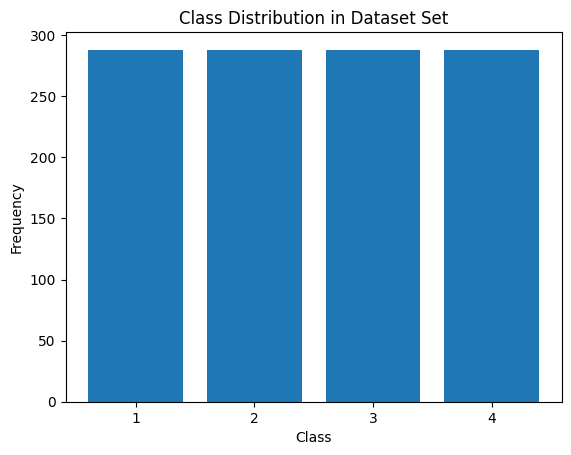

In [163]:
plt.hist(y, bins=np.arange(1,6) - 0.5, rwidth=0.8)
plt.xticks(range(1,5))
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution in Dataset Set')
plt.show()

In [164]:
l=[0,0,0,0]
for i in y:
  l[i-1]+=1
l

[288, 288, 288, 288]

In [165]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [166]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(921, 50375) (921,)
(231, 50375) (231,)


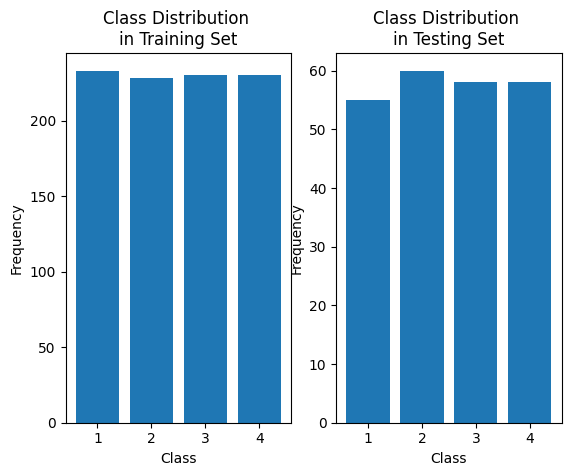

In [167]:
plt.subplot(1,2,1)
plt.hist(y_train, bins=np.arange(1,6) - 0.5, rwidth=0.8)
plt.xticks(range(1,5))
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution \nin Training Set')

plt.subplot(1,2,2)
plt.hist(y_test, bins=np.arange(1,6) - 0.5, rwidth=0.8)
plt.xticks(range(1,5))
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution \nin Testing Set')
plt.show()
plt.show()

In [168]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

clf = SVC(kernel='linear', C=1)
clf.fit(x_train, y_train)

SVC(C=1, kernel='linear')

In [169]:
y_pred = clf.predict(x_test)

In [170]:
acc = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", acc)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.2683982683982684
Confusion Matrix:
 [[22 12 12  9]
 [13 15 20 12]
 [17 11 12 18]
 [16 18 11 13]]


In [171]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [172]:
y_pred_rf = rf_model.predict(x_test)

In [173]:
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.341991341991342


In [214]:
conf_matrix = confusion_matrix(y_test, y_pred_rf)

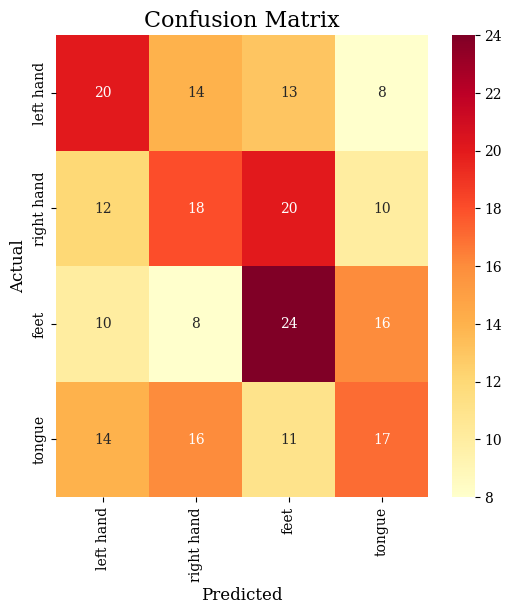

In [215]:
plt.figure(figsize=(6, 6))

plot_labels=["left hand","right hand", "feet", "tongue"]
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlOrRd", xticklabels=plot_labels, yticklabels=plot_labels)

plt.xlabel('Predicted', fontsize=12, fontfamily='serif')
plt.ylabel('Actual', fontsize=12, fontfamily='serif')
plt.title('Confusion Matrix', fontsize=16, fontfamily='serif')

plt.xticks(fontsize=10, fontfamily='serif', rotation=90)
plt.yticks(fontsize=10, fontfamily='serif')

plt.show()

In [216]:
y_pred_rf_2 = rf_model.predict(x_train)

In [219]:
conf_matrix2 = confusion_matrix(y_train, y_pred_rf_2)

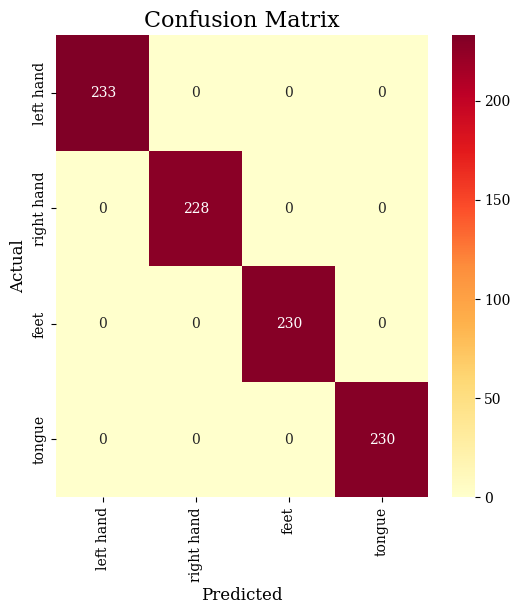

In [220]:
plt.figure(figsize=(6, 6))

plot_labels=["left hand","right hand", "feet", "tongue"]
sns.heatmap(conf_matrix2, annot=True, fmt="d", cmap="YlOrRd", xticklabels=plot_labels, yticklabels=plot_labels)

plt.xlabel('Predicted', fontsize=12, fontfamily='serif')
plt.ylabel('Actual', fontsize=12, fontfamily='serif')
plt.title('Confusion Matrix', fontsize=16, fontfamily='serif')

plt.xticks(fontsize=10, fontfamily='serif', rotation=90)
plt.yticks(fontsize=10, fontfamily='serif')

plt.show()

In [ ]:
# from xgboost import XGBClassifier

In [ ]:
# xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

In [174]:
y_train_adjusted = y_train - 1
y_test_adjusted = y_test - 1

In [ ]:
# xgb_model.fit(x_train, y_train_adjusted)

In [ ]:
# y_pred_xgb = xgb_model.predict(x_test)

In [ ]:
# xgb_accuracy = accuracy_score(y_test_adjusted, y_pred_xgb)
# print("XGBoost Accuracy:", xgb_accuracy)

In [175]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score

In [176]:
y_train_one_hot = to_categorical(y_train_adjusted, num_classes=4)
y_test_one_hot = to_categorical(y_test_adjusted, num_classes=4)

In [177]:
x_train.shape

(921, 50375)

In [178]:
x_train_reshaped = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test_reshaped = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [179]:
x_train_reshaped = x_train_reshaped / np.max(x_train_reshaped)
x_test_reshaped = x_test_reshaped / np.max(x_test_reshaped)

In [180]:
x_train_reshaped.shape

(921, 50375, 1)

In [ ]:
model = Sequential([
    LSTM(128, input_shape=(x_train_reshaped.shape[1], x_train_reshaped.shape[2]), return_sequences=True),
    Dropout(0.3),
    LSTM(64, return_sequences=True),
    Dropout(0.3),
    LSTM(32, return_sequences=False),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(4, activation='softmax')
])


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
history = model.fit(
    x_train_reshaped, y_train_one_hot,
    validation_data=(x_test, y_test_one_hot),
    epochs=5, batch_size=8, verbose=1
)

In [ ]:
model.save("LSTM_Model.h5")

In [ ]:
plt.figure(figsize=(12, 5))

plt.rcParams['font.family'] = 'serif'
plt.title('Model Accuracy', fontsize=16)

plt.plot(range(1, len(history.history['accuracy']) + 1), history.history['accuracy'], label='Train Accuracy')
plt.plot(range(1, len(history.history['val_accuracy']) + 1), history.history['val_accuracy'], label='Validation Accuracy')

plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(loc='upper left')

plt.ylim(0, 1)
plt.yticks([i * 0.1 for i in range(11)])

plt.tight_layout()
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
plt.figure(figsize=(12, 5))

plt.rcParams['font.family'] = 'serif'
plt.title('Model Loss', fontsize=16)

plt.plot(range(1, len(history.history['loss']) + 1), history.history['loss'], label='Train Loss')
plt.plot(range(1, len(history.history['val_loss']) + 1), history.history['val_loss'], label='Validation Loss')

plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(loc='upper left')

plt.ylim(0,1 + max(max(history.history['loss']), max(history.history['val_loss'])))

plt.tight_layout()
plt.grid()
plt.show()

In [ ]:
y_pred_prob = model.predict(x_test_reshaped)
y_pred = np.argmax(y_pred_prob, axis=1)

In [ ]:
lstm_accuracy = accuracy_score(y_test_adjusted, y_pred)
print("LSTM Accuracy:", lstm_accuracy)

In [ ]:
conf_matrix = confusion_matrix(y_test_adjusted, y_pred)

In [ ]:
plt.figure(figsize=(6, 6))

plot_labels=["left hand","right hand", "feet", "tongue"]
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlOrRd", xticklabels=plot_labels, yticklabels=plot_labels)

plt.xlabel('Predicted', fontsize=12, fontfamily='serif')
plt.ylabel('Actual', fontsize=12, fontfamily='serif')
plt.title('Confusion Matrix', fontsize=16, fontfamily='serif')

plt.xticks(fontsize=10, fontfamily='serif', rotation=90)
plt.yticks(fontsize=10, fontfamily='serif')

plt.show()

In [181]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

cnn_model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(x_train_reshaped.shape[1], x_train_reshaped.shape[2])),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Conv1D(128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Conv1D(256, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Conv1D(128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [182]:
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 50373, 64)           │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 25186, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 25186, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 25184, 128)          │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 12592, 128)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 12592, 128)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 12590, 256)          │          98,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 6295, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 6295, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 6293, 128)           │          98,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 3146, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 3146, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 402688)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │     103,088,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 103,343,748 (394.23 MB)

 Trainable params: 103,343,748 (394.23 MB)

 Non-trainable params: 0 (0.00 B)

In [183]:
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [184]:
print(x_train_reshaped.shape, y_train.shape)
print(x_test_reshaped.shape, y_test.shape)

(921, 50375, 1) (921,)
(231, 50375, 1) (231,)


In [185]:
cnn_history = cnn_model.fit(
    x_train_reshaped, y_train_one_hot,
    epochs=10, batch_size=8,
    validation_data=(x_test_reshaped, y_test_one_hot)
)

Epoch 1/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 39s 225ms/step - accuracy: 0.2540 - loss: 1.3920 - val_accuracy: 0.2511 - val_loss: 1.3866
Epoch 2/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 14s 124ms/step - accuracy: 0.2570 - loss: 1.3874 - val_accuracy: 0.2511 - val_loss: 1.3865
Epoch 3/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 15s 129ms/step - accuracy: 0.2230 - loss: 1.3927 - val_accuracy: 0.2381 - val_loss: 1.3870
Epoch 4/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 20s 127ms/step - accuracy: 0.2330 - loss: 1.3877 - val_accuracy: 0.2554 - val_loss: 1.3862
Epoch 5/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 21s 129ms/step - accuracy: 0.2528 - loss: 1.3859 - val_accuracy: 0.2511 - val_loss: 1.3867
Epoch 6/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 20s 127ms/step - accuracy: 0.2574 - loss: 1.3868 - val_accuracy: 0.2944 - val_loss: 1.3983
Epoch 7/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 21s 129ms/step - accuracy: 0.2678 - loss: 1.3887 - val_accuracy: 0.2381 - val_loss: 1.3872
Epoch 8/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 21s 130ms/step - accuracy: 0.2625 - loss: 1

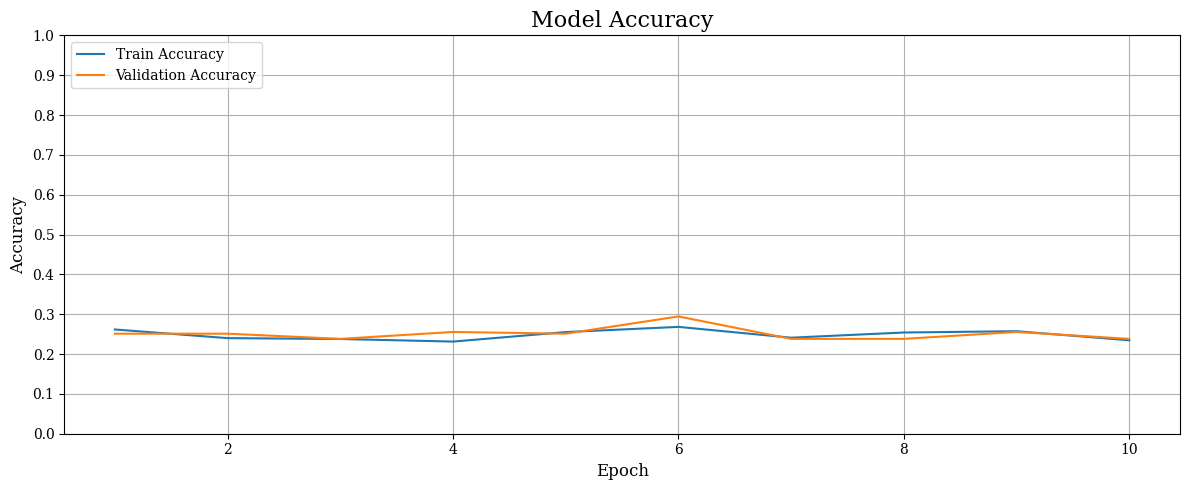

In [186]:
plt.figure(figsize=(12, 5))

plt.rcParams['font.family'] = 'serif'
plt.title('Model Accuracy', fontsize=16)

plt.plot(range(1, len(cnn_history.history['accuracy']) + 1), cnn_history.history['accuracy'], label='Train Accuracy')
plt.plot(range(1, len(cnn_history.history['val_accuracy']) + 1), cnn_history.history['val_accuracy'], label='Validation Accuracy')

plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(loc='upper left')

plt.ylim(0, 1)
plt.yticks([i * 0.1 for i in range(11)])

plt.tight_layout()
plt.grid()
plt.show()

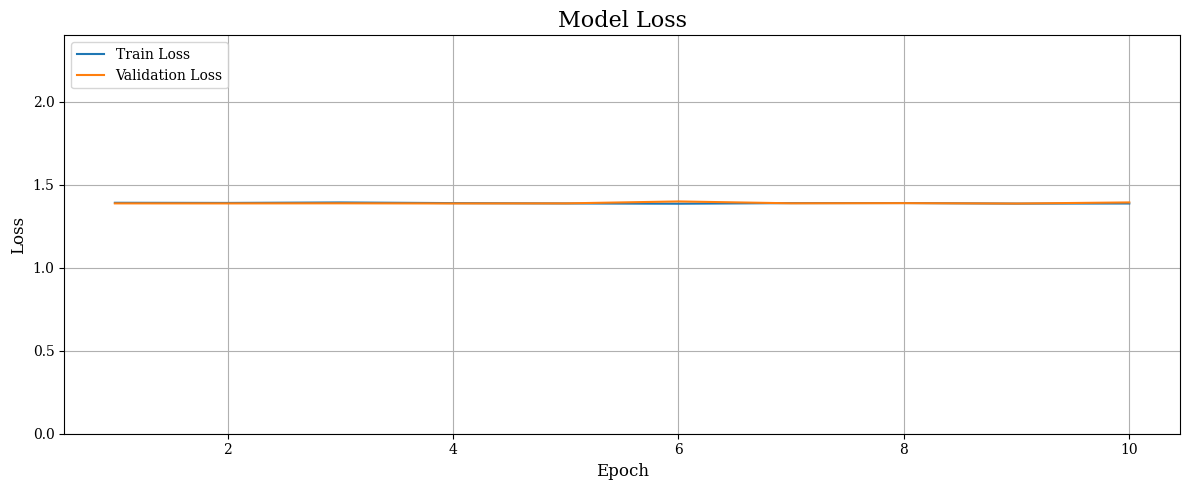

In [187]:
plt.figure(figsize=(12, 5))

plt.rcParams['font.family'] = 'serif'
plt.title('Model Loss', fontsize=16)

plt.plot(range(1, len(cnn_history.history['loss']) + 1), cnn_history.history['loss'], label='Train Loss')
plt.plot(range(1, len(cnn_history.history['val_loss']) + 1), cnn_history.history['val_loss'], label='Validation Loss')

plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(loc='upper left')

plt.ylim(0,1 + max(max(cnn_history.history['loss']), max(cnn_history.history['val_loss'])))

plt.tight_layout()
plt.grid()
plt.show()

In [188]:
loss, accuracy = cnn_model.evaluate(x_test_reshaped, y_test_one_hot)
print(f'Test accuracy: {accuracy}')

8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.2308 - loss: 1.3934
Test accuracy: 0.2380952388048172


In [189]:
y_pred_prob = cnn_model.predict(x_test_reshaped)
y_pred = np.argmax(y_pred_prob, axis=1)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step


In [190]:
conf_matrix = confusion_matrix(y_test_adjusted, y_pred)

In [191]:
conf_matrix

array([[55,  0,  0,  0],
       [60,  0,  0,  0],
       [58,  0,  0,  0],
       [58,  0,  0,  0]])

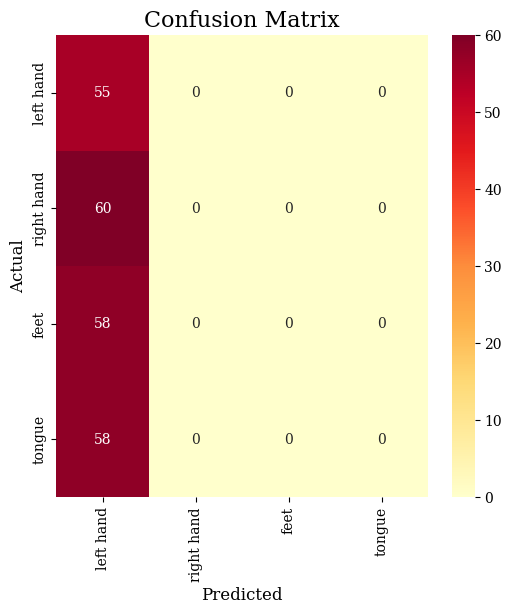

In [193]:
import seaborn as sns
plt.figure(figsize=(6, 6))

plot_labels=["left hand","right hand", "feet", "tongue"]
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlOrRd", xticklabels=plot_labels, yticklabels=plot_labels)

plt.xlabel('Predicted', fontsize=12, fontfamily='serif')
plt.ylabel('Actual', fontsize=12, fontfamily='serif')
plt.title('Confusion Matrix', fontsize=16, fontfamily='serif')

plt.xticks(fontsize=10, fontfamily='serif', rotation=90)
plt.yticks(fontsize=10, fontfamily='serif')

plt.show()

In [194]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Flatten, Dense, BatchNormalization, GlobalAveragePooling1D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [200]:
cnn_model2 = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(x_train_reshaped.shape[1], x_train_reshaped.shape[2]), kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Conv1D(128, kernel_size=3, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Conv1D(256, kernel_size=3, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Conv1D(512, kernel_size=3, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.4),

    Conv1D(512, kernel_size=3, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.4),

    GlobalAveragePooling1D(),
    Dense(256, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

cnn_model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-5)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [201]:
cnn_model2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_14 (Conv1D)                   │ (None, 50373, 64)           │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 50373, 64)           │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_14 (MaxPooling1D)      │ (None, 25186, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 25186, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_15 (Conv1D)                   │ (None, 25184, 128)          │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 25184, 128)          │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_15 (MaxPooling1D)      │ (None, 12592, 128)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 12592, 128)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_16 (Conv1D)                   │ (None, 12590, 256)          │          98,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 12590, 256)          │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_16 (MaxPooling1D)      │ (None, 6295, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 6295, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_17 (Conv1D)                   │ (None, 6293, 512)           │         393,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 6293, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_17 (MaxPooling1D)      │ (None, 3146, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 3146, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_18 (Conv1D)                   │ (None, 3144, 512)           │         786,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 3144, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_18 (MaxPooling1D)      │ (None, 1572, 512)           │              

 Total params: 1,474,820 (5.63 MB)

 Trainable params: 1,471,876 (5.61 MB)

 Non-trainable params: 2,944 (11.50 KB)

In [202]:
cnn_history2 = cnn_model2.fit(
    x_train_reshaped, y_train_one_hot,
    epochs=10, batch_size=8,
    validation_data=(x_test_reshaped, y_test_one_hot)
)

Epoch 1/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 63s 376ms/step - accuracy: 0.2598 - loss: 12.5000 - val_accuracy: 0.2511 - val_loss: 4.0005
Epoch 2/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 49s 208ms/step - accuracy: 0.2410 - loss: 3.5373 - val_accuracy: 0.2511 - val_loss: 2.5294
Epoch 3/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 40s 203ms/step - accuracy: 0.2645 - loss: 2.3461 - val_accuracy: 0.2597 - val_loss: 2.0109
Epoch 4/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 41s 206ms/step - accuracy: 0.2294 - loss: 1.9191 - val_accuracy: 0.2597 - val_loss: 1.7242
Epoch 5/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 41s 204ms/step - accuracy: 0.2711 - loss: 1.6893 - val_accuracy: 0.2511 - val_loss: 1.5889
Epoch 6/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 41s 204ms/step - accuracy: 0.2764 - loss: 1.5710 - val_accuracy: 0.2381 - val_loss: 1.5140
Epoch 7/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 41s 205ms/step - accuracy: 0.2510 - loss: 1.5018 - val_accuracy: 0.2381 - val_loss: 1.4710
Epoch 8/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 41s 204ms/step - accuracy: 0.2899 - loss: 

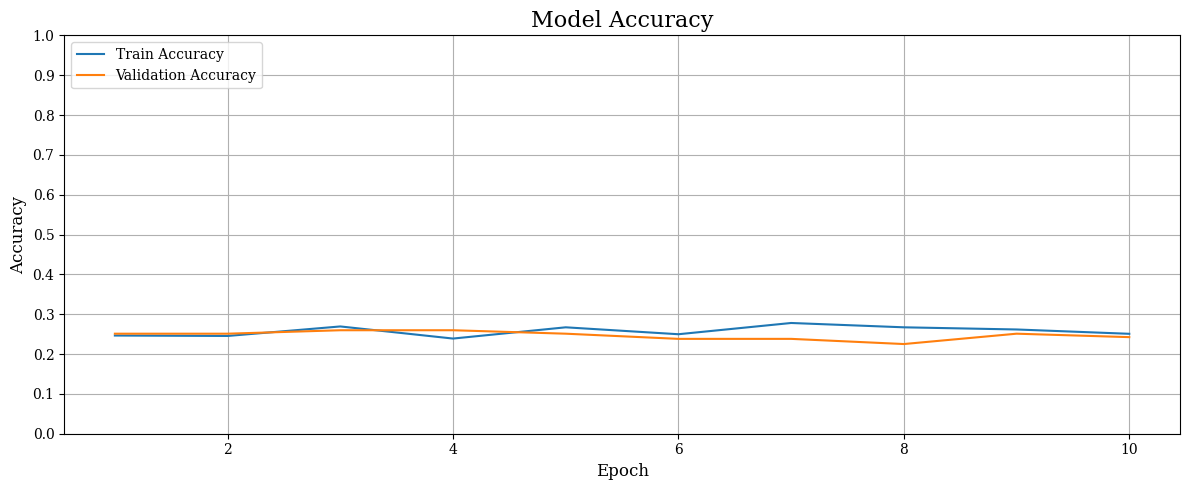

In [208]:
plt.figure(figsize=(12, 5))

plt.rcParams['font.family'] = 'serif'
plt.title('Model Accuracy', fontsize=16)

plt.plot(range(1, len(cnn_history2.history['accuracy']) + 1), cnn_history2.history['accuracy'], label='Train Accuracy')
plt.plot(range(1, len(cnn_history2.history['val_accuracy']) + 1), cnn_history2.history['val_accuracy'], label='Validation Accuracy')

plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(loc='upper left')

plt.ylim(0, 1)
plt.yticks([i * 0.1 for i in range(11)])

plt.tight_layout()
plt.grid()
plt.show()

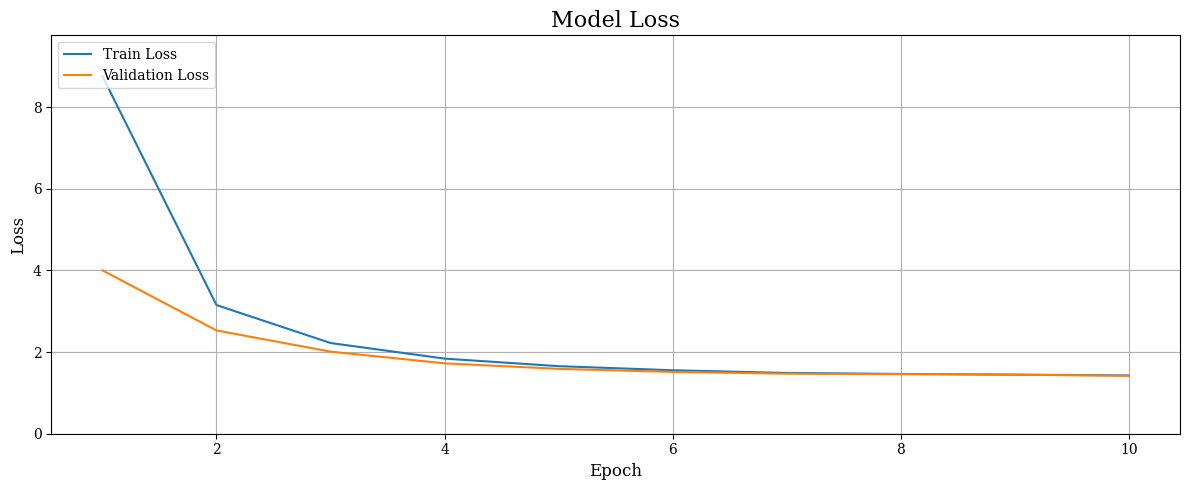

In [206]:
plt.figure(figsize=(12, 5))

plt.rcParams['font.family'] = 'serif'
plt.title('Model Loss', fontsize=16)

plt.plot(range(1, len(cnn_history2.history['loss']) + 1), cnn_history2.history['loss'], label='Train Loss')
plt.plot(range(1, len(cnn_history2.history['val_loss']) + 1), cnn_history2.history['val_loss'], label='Validation Loss')

plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(loc='upper left')

plt.ylim(0,1 + max(max(cnn_history2.history['loss']), max(cnn_history2.history['val_loss'])))

plt.tight_layout()
plt.grid()
plt.show()

In [209]:
loss, accuracy = cnn_model2.evaluate(x_test_reshaped, y_test_one_hot)
print(f'Test accuracy: {accuracy}')

8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - accuracy: 0.2364 - loss: 1.4205
Test accuracy: 0.24242424964904785


In [210]:
y_pred_prob = cnn_model.predict(x_test_reshaped)
y_pred = np.argmax(y_pred_prob, axis=1)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step


In [211]:
conf_matrix = confusion_matrix(y_test_adjusted, y_pred)

In [212]:
conf_matrix

array([[55,  0,  0,  0],
       [60,  0,  0,  0],
       [58,  0,  0,  0],
       [58,  0,  0,  0]])

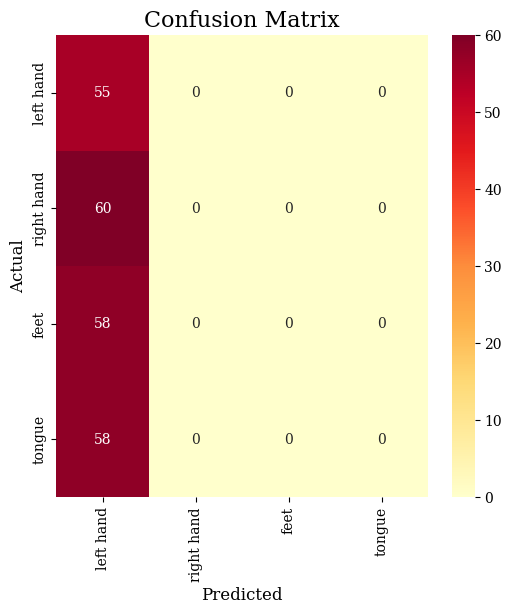

In [213]:
plt.figure(figsize=(6, 6))

plot_labels=["left hand","right hand", "feet", "tongue"]
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlOrRd", xticklabels=plot_labels, yticklabels=plot_labels)

plt.xlabel('Predicted', fontsize=12, fontfamily='serif')
plt.ylabel('Actual', fontsize=12, fontfamily='serif')
plt.title('Confusion Matrix', fontsize=16, fontfamily='serif')

plt.xticks(fontsize=10, fontfamily='serif', rotation=90)
plt.yticks(fontsize=10, fontfamily='serif')

plt.show()